## EDA for global temperature

### Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib import style
style.use('seaborn')
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/global-warming-dataset/DA proj/continents2.csv
/kaggle/input/global-warming-dataset/DA proj/GlobalTemperatures.csv
/kaggle/input/global-warming-dataset/DA proj/GlobalLandTemperaturesByCity.csv


## Importing csv

In [2]:
orig_temp_data = pd.read_csv('../input/global-warming-dataset/DA proj/GlobalTemperatures.csv')
global_temp_df = orig_temp_data.copy()
global_temp_data = orig_temp_data.copy()

global_temp_df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


## Counting number of rows and columns

In [3]:
print("Total rows in the dataset:",global_temp_df.count()["dt"])
print(" Total Number of Columns in the dataset: ",len(global_temp_df. axes[1]))


Total rows in the dataset: 3192
 Total Number of Columns in the dataset:  9


## Counting Number of missing values in each column

In [4]:
print("Total Number of Missing Values in each Column:",global_temp_df.isnull().sum())

Total Number of Missing Values in each Column: dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64


## Calculating total number of missing values

In [5]:
print(" Total Number of Missing Values",global_temp_df.isnull().sum().sum())
       

 Total Number of Missing Values 7224


## Calculating the total number of outliers

In [6]:
Q1 = global_temp_df.quantile(0.25)
Q3 = global_temp_df.quantile(0.75)
IQR = Q3 - Q1
print("Total Number of Outliers for each column \n",((global_temp_df < (Q1 - 1.5 * IQR)) | (global_temp_df > (Q3 + 1.5 * IQR))).sum())
print("Total Number of Outliers ",((global_temp_df < (Q1 - 1.5 * IQR)) | (global_temp_df > (Q3 + 1.5 * IQR))).sum().sum())

Total Number of Outliers for each column 
 LandAndOceanAverageTemperature                 0
LandAndOceanAverageTemperatureUncertainty    100
LandAverageTemperature                         0
LandAverageTemperatureUncertainty            152
LandMaxTemperature                             0
LandMaxTemperatureUncertainty                222
LandMinTemperature                             0
LandMinTemperatureUncertainty                254
dt                                             0
dtype: int64
Total Number of Outliers  728


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """


In [7]:
global_temp_df.duplicated(keep=False)

0       False
1       False
2       False
3       False
4       False
        ...  
3187    False
3188    False
3189    False
3190    False
3191    False
Length: 3192, dtype: bool

> **Fromt the above we can infer that we don't have any duplicate data**

In [8]:
global_temp_df = global_temp_df[['dt', 'LandAndOceanAverageTemperature']]
global_temp_df['dt'] = pd.to_datetime(global_temp_df['dt'])
global_temp_df.set_index('dt', inplace = True)
global_temp_df.sort_index(axis = 0, inplace = True)
global_temp_df = global_temp_df.resample('A').mean()
global_temp_df.rename(columns = {'LandAndOceanAverageTemperature': 'AnnualAverageTemp'}, inplace = True)
global_temp_df.index.rename('Year', inplace = True)
global_temp_df.index = global_temp_df.index.year




In [9]:
print(global_temp_df.isnull().sum())
print(global_temp_df[global_temp_df['AnnualAverageTemp'].isnull()].index)

AnnualAverageTemp    100
dtype: int64
Int64Index([1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 1760,
            1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768, 1769, 1770, 1771,
            1772, 1773, 1774, 1775, 1776, 1777, 1778, 1779, 1780, 1781, 1782,
            1783, 1784, 1785, 1786, 1787, 1788, 1789, 1790, 1791, 1792, 1793,
            1794, 1795, 1796, 1797, 1798, 1799, 1800, 1801, 1802, 1803, 1804,
            1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 1813, 1814, 1815,
            1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823, 1824, 1825, 1826,
            1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834, 1835, 1836, 1837,
            1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848,
            1849],
           dtype='int64', name='Year')


In [10]:
global_temp_df.dropna(inplace = True)
orig_temp_data.dropna()
global_temp_data.dropna(inplace = True)

In [11]:
global_temp_data.dtypes

dt                                            object
LandAverageTemperature                       float64
LandAverageTemperatureUncertainty            float64
LandMaxTemperature                           float64
LandMaxTemperatureUncertainty                float64
LandMinTemperature                           float64
LandMinTemperatureUncertainty                float64
LandAndOceanAverageTemperature               float64
LandAndOceanAverageTemperatureUncertainty    float64
dtype: object

In [12]:
global_temp_data[['year', 'month', 'date']] = global_temp_data.dt.str.split("-",expand=True)
global_temp_data.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,year,month,date
1200,1850-01-01,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367,1850,01,01
1201,1850-02-01,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414,1850,02,01
1202,1850-03-01,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341,1850,03,01
1203,1850-04-01,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267,1850,04,01
1204,1850-05-01,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249,1850,05,01


In [13]:
global_temp_data = global_temp_data.drop(["LandMaxTemperature","LandMaxTemperatureUncertainty","LandMinTemperature","LandMinTemperatureUncertainty"],axis=1)
global_temp_data.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,year,month,date
1200,1850-01-01,0.749,1.105,12.833,0.367,1850,01,01
1201,1850-02-01,3.071,1.275,13.588,0.414,1850,02,01
1202,1850-03-01,4.954,0.955,14.043,0.341,1850,03,01
1203,1850-04-01,7.217,0.665,14.667,0.267,1850,04,01
1204,1850-05-01,10.004,0.617,15.507,0.249,1850,05,01


In [14]:

global_temp_data['year'] = global_temp_data['year'].astype(str).astype(int)
global_temp_data['month'] = global_temp_data['month'].astype(str).astype(int)

global_temp_data = global_temp_data.drop(["dt","date"],axis=1)
global_temp_data.head()


,LandAverageTemperature,LandAverageTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,year,month
1200,0.749,1.105,12.833,0.367,1850,1
1201,3.071,1.275,13.588,0.414,1850,2
1202,4.954,0.955,14.043,0.341,1850,3
1203,7.217,0.665,14.667,0.267,1850,4
1204,10.004,0.617,15.507,0.249,1850,5


## Determing the correlation between the variables.


<AxesSubplot:>

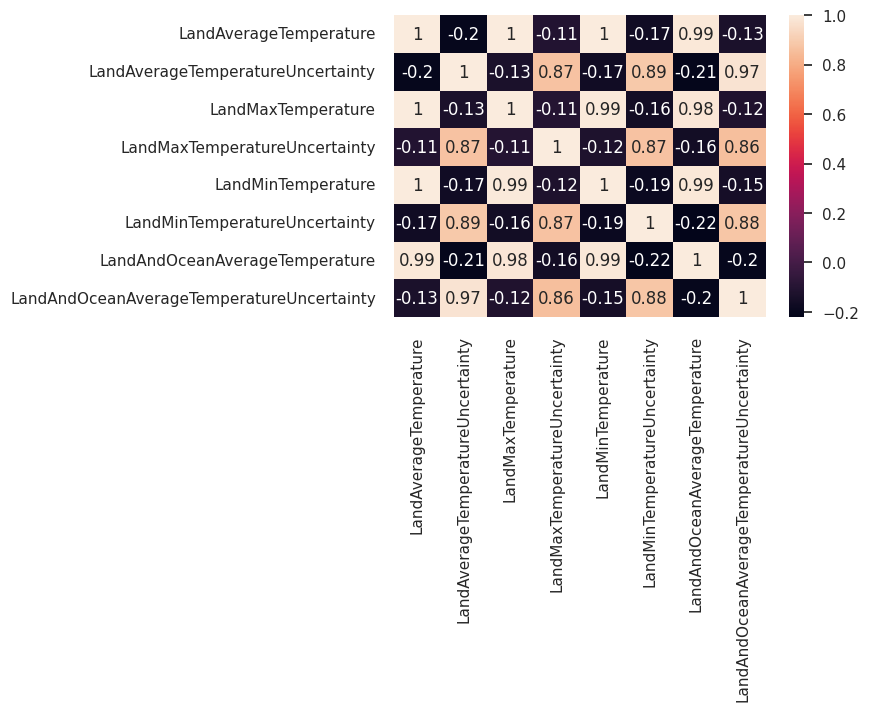

In [88]:
corr=orig_temp_data.corr(method='pearson')
sns.heatmap(corr,annot=True)

In [16]:
global_ref_temp = global_temp_df.loc['1951':'1980'].mean()['AnnualAverageTemp'] 

# Create the temperature anomaly column
global_temp_df['Temperature Anomaly'] = global_temp_df['AnnualAverageTemp'] - global_ref_temp
global_temp_df.drop(['AnnualAverageTemp'], axis = 1, inplace = True)

global_temp_df.head()

,Temperature Anomaly
Year,
1850,-0.432381
1851,-0.307714
1852,-0.293047
1853,-0.344381
1854,-0.308547


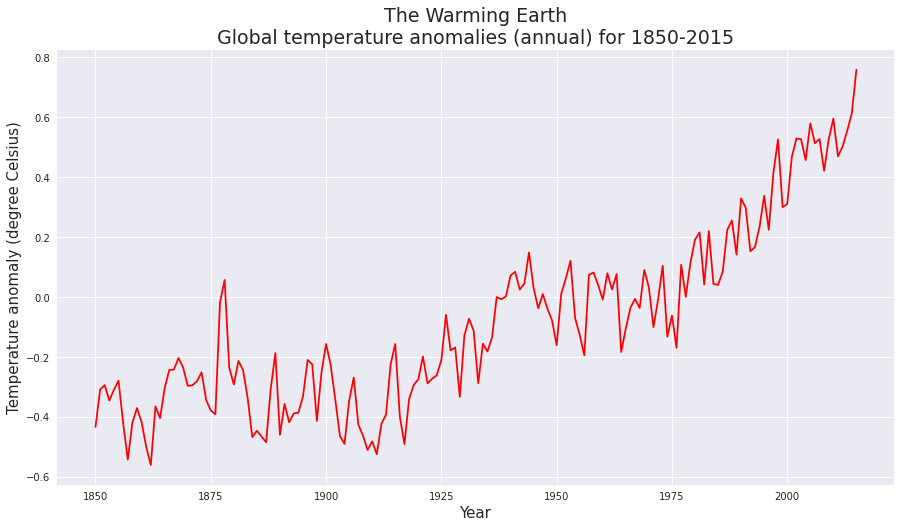

In [17]:
plt.figure(figsize = (15, 8))

plt.plot(global_temp_df['Temperature Anomaly'], 'r')

plt.title('The Warming Earth\nGlobal temperature anomalies (annual) for 1850-2015', fontsize = 19)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Temperature anomaly (degree Celsius)', fontsize = 15)

plt.show()

### Principal Component Analysis

## Dimensionality reduction preprocessing technique

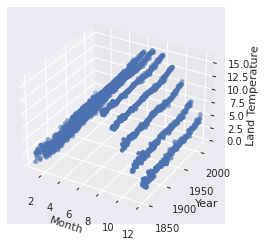

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(global_temp_data['month'], global_temp_data['year'], global_temp_data['LandAverageTemperature'], marker='o')
ax.set_xlabel('Month')
ax.set_ylabel('Year')
ax.set_zlabel('Land Temperature')
plt.show()

<AxesSubplot:xlabel='year', ylabel='LandAverageTemperature'>

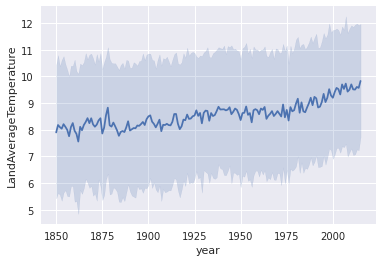

In [19]:
sns.lineplot(data=global_temp_data, x="year", y="LandAverageTemperature")

## PCA helps in visualizing the data closer. We can observe the rise in the average land temperature from 1850 to 2000

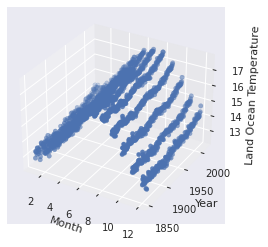

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(global_temp_data['month'], global_temp_data['year'], global_temp_data['LandAndOceanAverageTemperature'], marker='o')
ax.set_xlabel('Month')
ax.set_ylabel('Year')
ax.set_zlabel('Land Ocean Temperature')
plt.show()

<AxesSubplot:xlabel='year', ylabel='LandAndOceanAverageTemperature'>

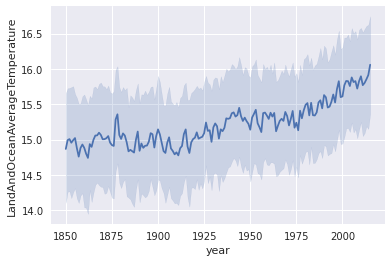

In [21]:
sns.lineplot(data=global_temp_data, x="year", y="LandAndOceanAverageTemperature")

## From this we can see that the average Land and Ocean temperature has constantly risen from 1850 to 2000

count    166.000000
mean      -0.086981
std        0.298629
min       -0.559464
25%       -0.308339
50%       -0.155339
75%        0.079557
max        0.759036
Name: Temperature Anomaly, dtype: float64


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


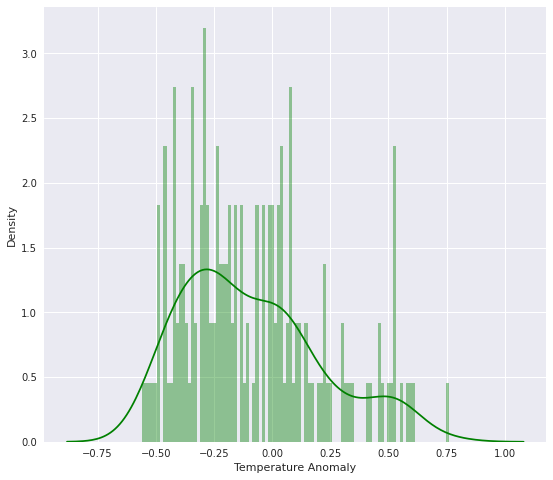

In [22]:
print(global_temp_df['Temperature Anomaly'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(global_temp_df['Temperature Anomaly'], color='g', bins=100, hist_kws={'alpha': 0.4});

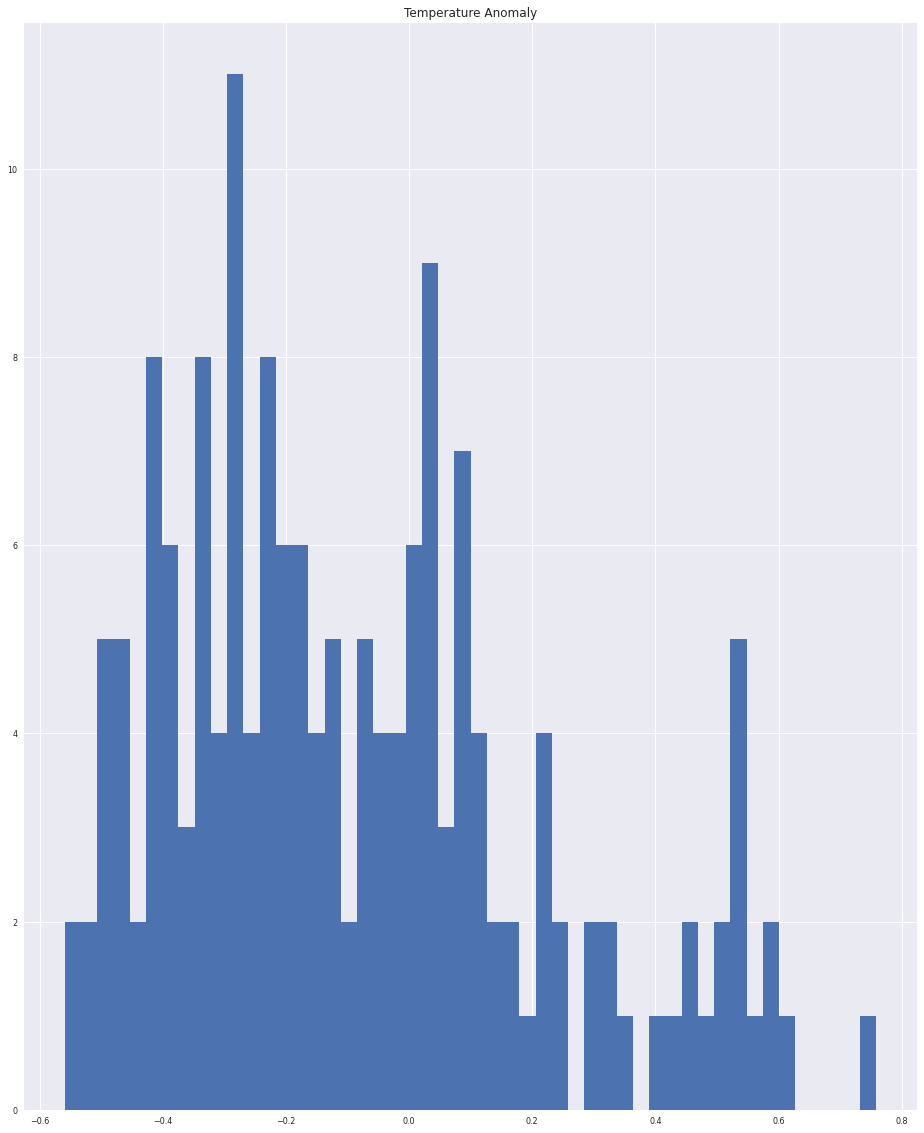

In [23]:
global_temp_df = global_temp_df.select_dtypes(include = ['float64', 'int64'])
global_temp_df.head()
global_temp_df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

# **EDA FOR GLOBAL TEMPERATURES BY CITIES**


In [24]:
!pip install seaborn==0.11.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.1/283.1 kB 437.7 kB/s eta 0:00:00a 0:00:01
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.1.0 requires markupsafe~=2.0.1, but you have markupsafe 2.1.1 which is incompatible.


### Importing Libraries

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

plt.rcParams['figure.figsize'] = [6, 4]
plt.rcParams['figure.dpi'] = 100

sns.set(style="whitegrid")
sns.set_color_codes("pastel")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/global-warming-dataset/DA proj/continents2.csv
/kaggle/input/global-warming-dataset/DA proj/GlobalTemperatures.csv
/kaggle/input/global-warming-dataset/DA proj/GlobalLandTemperaturesByCity.csv


### Importing CSV 

In [26]:
data = pd.read_csv("../input/global-warming-dataset/DA proj/GlobalLandTemperaturesByCity.csv")
temp_data=data.copy()
data.tail()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E
8599210,2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E
8599211,2013-09-01,NaN,NaN,Zwolle,Netherlands,52.24N,5.26E


### Calculating the Total Number of rows and columns,finding the maximum and minimum average temperature

In [27]:
print("Total rows in the dataset:",data.count()["dt"])
print("Maximum recorded temperature:",data.max()["AverageTemperature"])
print("Minimum recorded temperature:",data.min()["AverageTemperature"])
print("Total Number of Columns in the dataset: ",len(data. axes[1]))

Total rows in the dataset: 8599212
Maximum recorded temperature: 39.651
Minimum recorded temperature: -42.70399999999999
Total Number of Columns in the dataset:  7


### Calculating the total Number of missing values

In [28]:
print("Total Number of Missing Values in each Column:",data.isnull().sum())
print("Total rows in the dataset:",data.count()["dt"])
print(" Total Number of Missing Values",data.isnull().sum().sum())

Total Number of Missing Values in each Column: dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64
Total rows in the dataset: 8599212
 Total Number of Missing Values 728260


### Checking for dupicate data 

In [29]:
data.duplicated(keep=False)

0          False
1          False
2          False
3          False
4          False
           ...  
8599207    False
8599208    False
8599209    False
8599210    False
8599211    False
Length: 8599212, dtype: bool

> **From the above result we can infer there is no duplicate data present**.

### Checking for Outliers

In [30]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print("Total Number of Outliers for each column \n",((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum())
print("Total Number of Outliers ",((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum().sum())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  after removing the cwd from sys.path.


Total Number of Outliers for each column 
 AverageTemperature               100669
AverageTemperatureUncertainty    500594
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dt                                    0
dtype: int64


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """


Total Number of Outliers  601263


#### We are interested in the finding the rise in temperature for data pertaining to Abiko city.

In [31]:
city_data = data[data["City"]=="Abiko"]
city_data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
45530,1845-01-01,2.377,2.006,Abiko,Japan,36.17N,139.23E
45531,1845-02-01,1.312,2.968,Abiko,Japan,36.17N,139.23E
45532,1845-03-01,5.276,1.506,Abiko,Japan,36.17N,139.23E
45533,1845-04-01,10.387,1.508,Abiko,Japan,36.17N,139.23E
45534,1845-05-01,14.923,1.448,Abiko,Japan,36.17N,139.23E


In [32]:
print("Total rows in the dataset:",city_data.count()["dt"])
print("Maximum recorded temperature:",city_data.max()["AverageTemperature"])
print("Minimum recorded temperature:",city_data.min()["AverageTemperature"])
print("Average recorded temperature:",city_data.mean()["AverageTemperature"])

Total rows in the dataset: 2025
Maximum recorded temperature: 27.295
Minimum recorded temperature: -1.5799999999999998
Average recorded temperature: 12.555997524752476


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


In [33]:
city_data.describe(include=['object'])

,dt,City,Country,Latitude,Longitude
count,2025,2025,2025,2025,2025
unique,2025,1,1,1,1
top,1845-01-01,Abiko,Japan,36.17N,139.23E
freq,1,2025,2025,2025,2025


In [34]:
city_data = city_data.drop(["City","Country","Latitude","Longitude"],axis=1)
city_data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty
45530,1845-01-01,2.377,2.006
45531,1845-02-01,1.312,2.968
45532,1845-03-01,5.276,1.506
45533,1845-04-01,10.387,1.508
45534,1845-05-01,14.923,1.448


In [35]:
city_data[['year', 'month', 'date']] = city_data.dt.str.split("-",expand=True)
city_data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,year,month,date
45530,1845-01-01,2.377,2.006,1845,01,01
45531,1845-02-01,1.312,2.968,1845,02,01
45532,1845-03-01,5.276,1.506,1845,03,01
45533,1845-04-01,10.387,1.508,1845,04,01
45534,1845-05-01,14.923,1.448,1845,05,01


In [36]:
city_data.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
year                              object
month                             object
date                              object
dtype: object

In [37]:
city_data['dt'] = pd.to_datetime(city_data['dt'])
city_data['year'] = city_data['year'].astype(str).astype(int)
city_data['month'] = city_data['month'].astype(str).astype(int)
city_data['date'] = city_data['date'].astype(str).astype(int)
city_data.dtypes

dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
year                                      int64
month                                     int64
date                                      int64
dtype: object

In [38]:
city_data = city_data.drop(["dt","date"],axis=1)
city_data.head()

,AverageTemperature,AverageTemperatureUncertainty,year,month
45530,2.377,2.006,1845,1
45531,1.312,2.968,1845,2
45532,5.276,1.506,1845,3
45533,10.387,1.508,1845,4
45534,14.923,1.448,1845,5


In [39]:
city_data.rename(columns = {'AverageTemperature':'temperature', 'AverageTemperatureUncertainty':'deviation'}, inplace = True)
city_data.head()

,temperature,deviation,year,month
45530,2.377,2.006,1845,1
45531,1.312,2.968,1845,2
45532,5.276,1.506,1845,3
45533,10.387,1.508,1845,4
45534,14.923,1.448,1845,5


In [40]:
city_data.index = np.arange(1, len(city_data) + 1) 
city_data.head()

,temperature,deviation,year,month
1,2.377,2.006,1845,1
2,1.312,2.968,1845,2
3,5.276,1.506,1845,3
4,10.387,1.508,1845,4
5,14.923,1.448,1845,5


In [41]:
missing_data = city_data[city_data.isnull().any(axis=1)]
print("Total rows with missing data:",len(missing_data))

Total rows with missing data: 5


In [42]:
temp_data = temp_data.dropna()

### Checking for correlation between the variables

<AxesSubplot:>

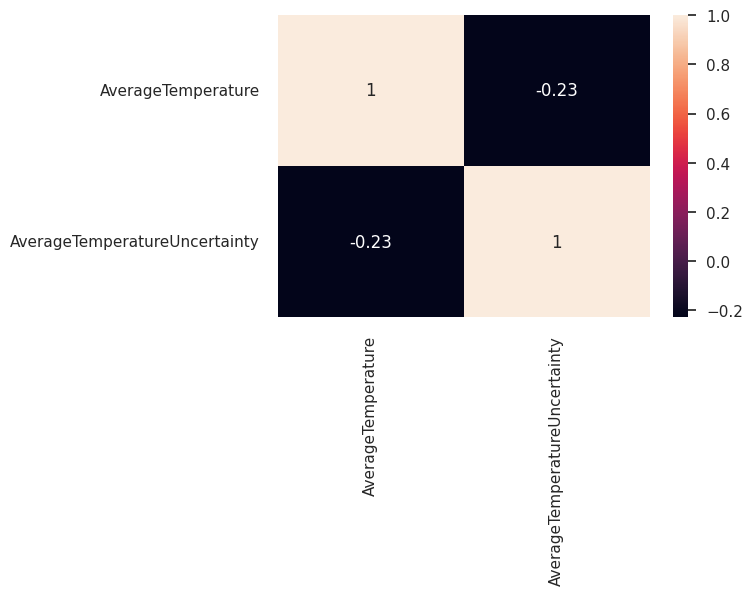

In [43]:
corr=temp_data.corr(method='pearson')
sns.heatmap(corr,annot=True)

##### Let us look at the histogram of the years and with missing data.

<AxesSubplot:xlabel='year', ylabel='count'>

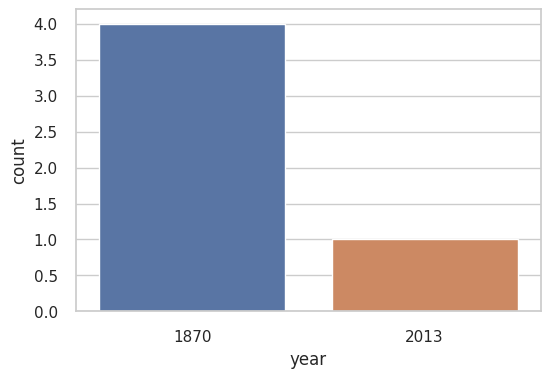

In [44]:
sns.countplot(x="year", data=missing_data)

<AxesSubplot:xlabel='month', ylabel='count'>

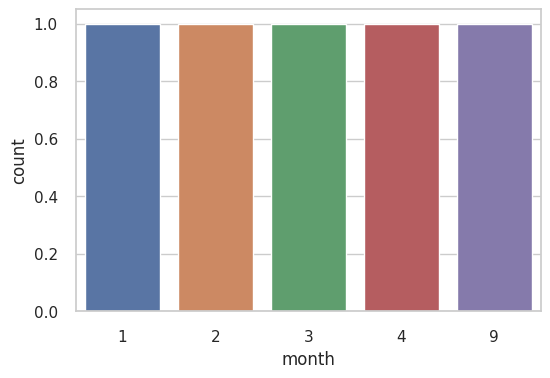

In [45]:
sns.countplot(x="month", data=missing_data)

In [46]:
print("Number of rows before removing missing data:",len(city_data))
city_data = city_data.dropna()
print("Number of rows after removing missing data:",len(city_data))

Number of rows before removing missing data: 2025
Number of rows after removing missing data: 2020


<AxesSubplot:xlabel='month', ylabel='temperature'>

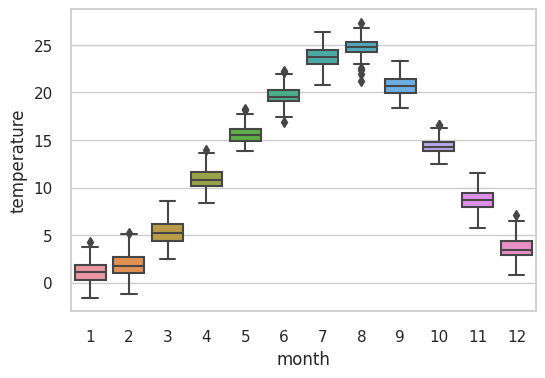

In [47]:
sns.boxplot(x="month", y="temperature", data=city_data)

<AxesSubplot:xlabel='year', ylabel='temperature'>

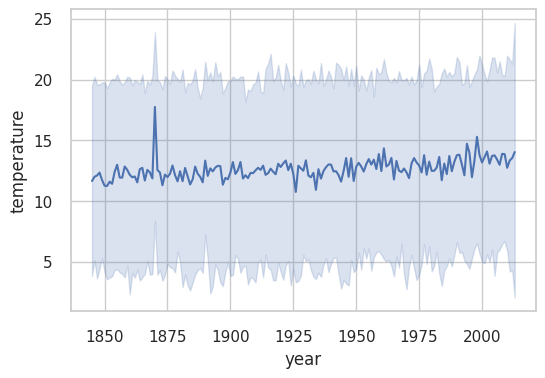

In [48]:
sns.lineplot(data=city_data, x="year", y="temperature", estimator=np.median)

##### Let us plot the mean temperature for all years in the dataset for the month of January , May and December

<AxesSubplot:xlabel='year', ylabel='temperature'>

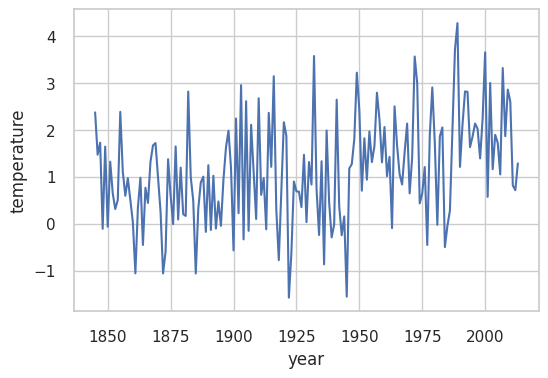

In [49]:
sns.lineplot(data=city_data[city_data["month"]==1], x="year", y="temperature")

<AxesSubplot:xlabel='year', ylabel='temperature'>

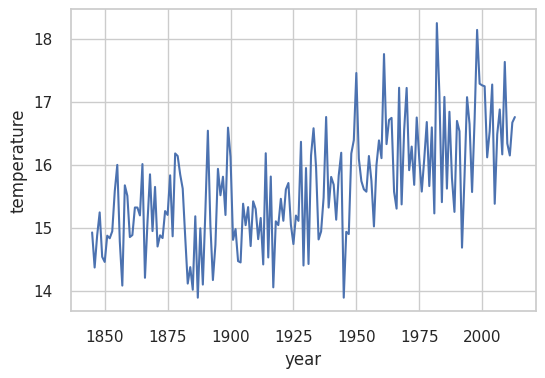

In [50]:
sns.lineplot(data=city_data[city_data["month"]==5], x="year", y="temperature")

<AxesSubplot:xlabel='year', ylabel='temperature'>

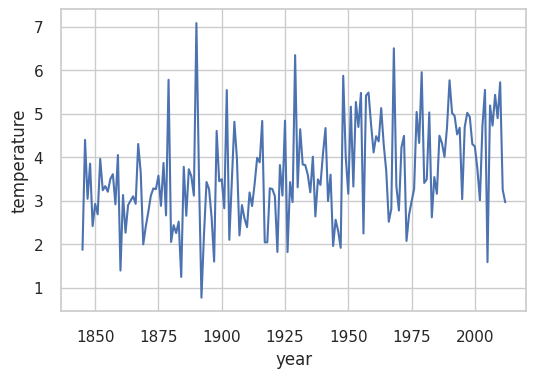

In [51]:
sns.lineplot(data=city_data[city_data["month"]==12], x="year", y="temperature")

##### We will plot the lineplot of mean deviation for each month in the dataset

<AxesSubplot:xlabel='month', ylabel='deviation'>

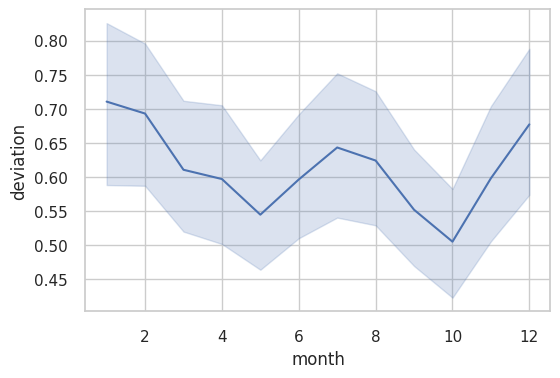

In [52]:
sns.lineplot(x="month", y="deviation", data=city_data)

##### We will plot the lineplot of mean deviation for Months January, May and December in the dataset

<AxesSubplot:xlabel='year', ylabel='deviation'>

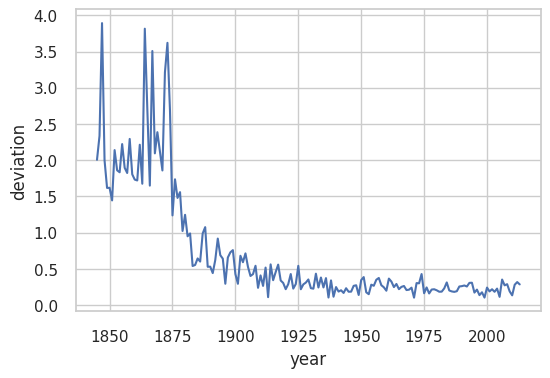

In [53]:
sns.lineplot(x="year", y="deviation", data=city_data[city_data["month"]==1])

<AxesSubplot:xlabel='year', ylabel='deviation'>

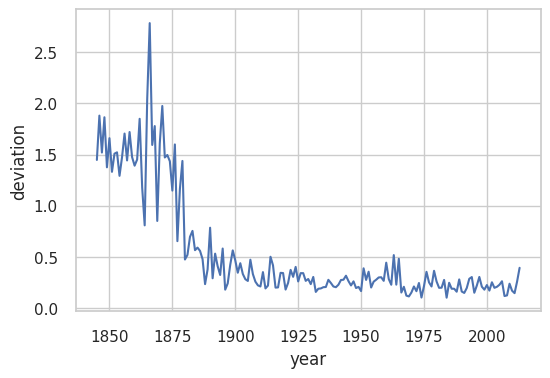

In [54]:
sns.lineplot(x="year", y="deviation", data=city_data[city_data["month"]==5])

<AxesSubplot:xlabel='year', ylabel='deviation'>

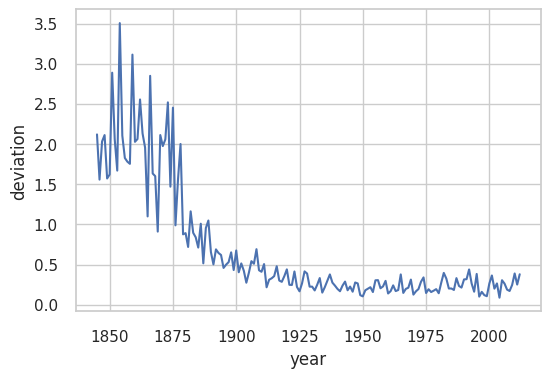

In [55]:
sns.lineplot(x="year", y="deviation", data=city_data[city_data["month"]==12])

##### We will plot the scatter to find the correlation between deviation and temperature

<AxesSubplot:xlabel='temperature', ylabel='deviation'>

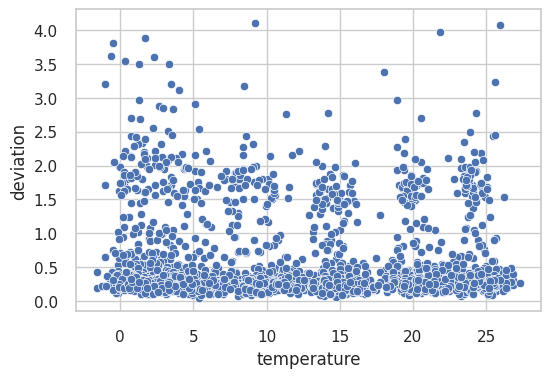

In [56]:
sns.scatterplot(data=city_data, x="temperature", y="deviation")

## PRINCIPAL COMPONENT ANALYSIS

### Dimensionilty reduction preprocessing techinque

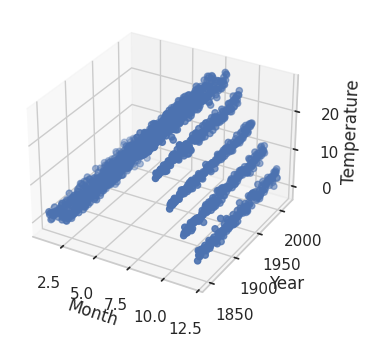

In [57]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(city_data['month'], city_data['year'], city_data['temperature'], marker='o')
ax.set_xlabel('Month')
ax.set_ylabel('Year')
ax.set_zlabel('Temperature')
plt.show()

<AxesSubplot:xlabel='year', ylabel='temperature'>

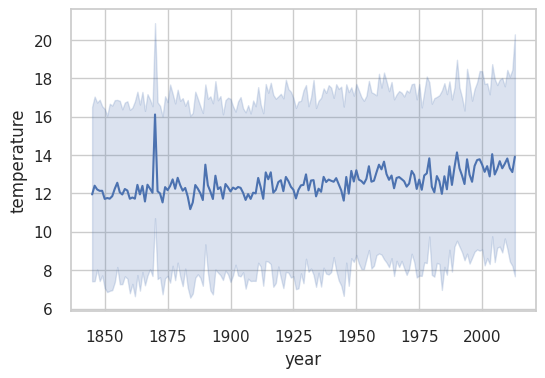

In [58]:
sns.lineplot(data=city_data, x="year", y="temperature")

> **PCA helps in visualizing the data closer. We can observe the rise in the temperature over the years from 1800s to 2000s**

count    2020.000000
mean       12.555998
std         8.230291
min        -1.580000
25%         4.514500
50%        13.111500
75%        20.169000
max        27.295000
Name: temperature, dtype: float64


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


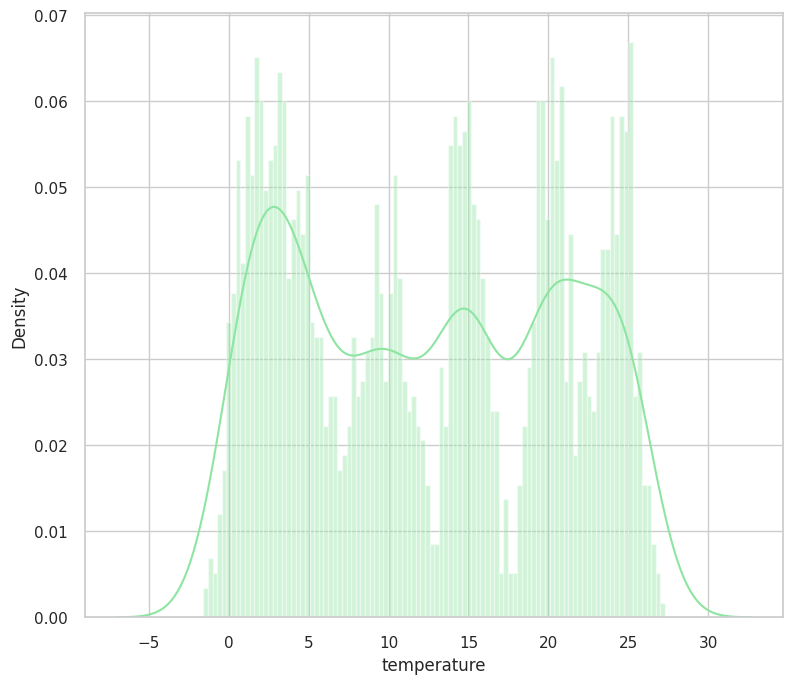

In [59]:
print(city_data['temperature'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(city_data['temperature'], color='g', bins=100, hist_kws={'alpha': 0.4});

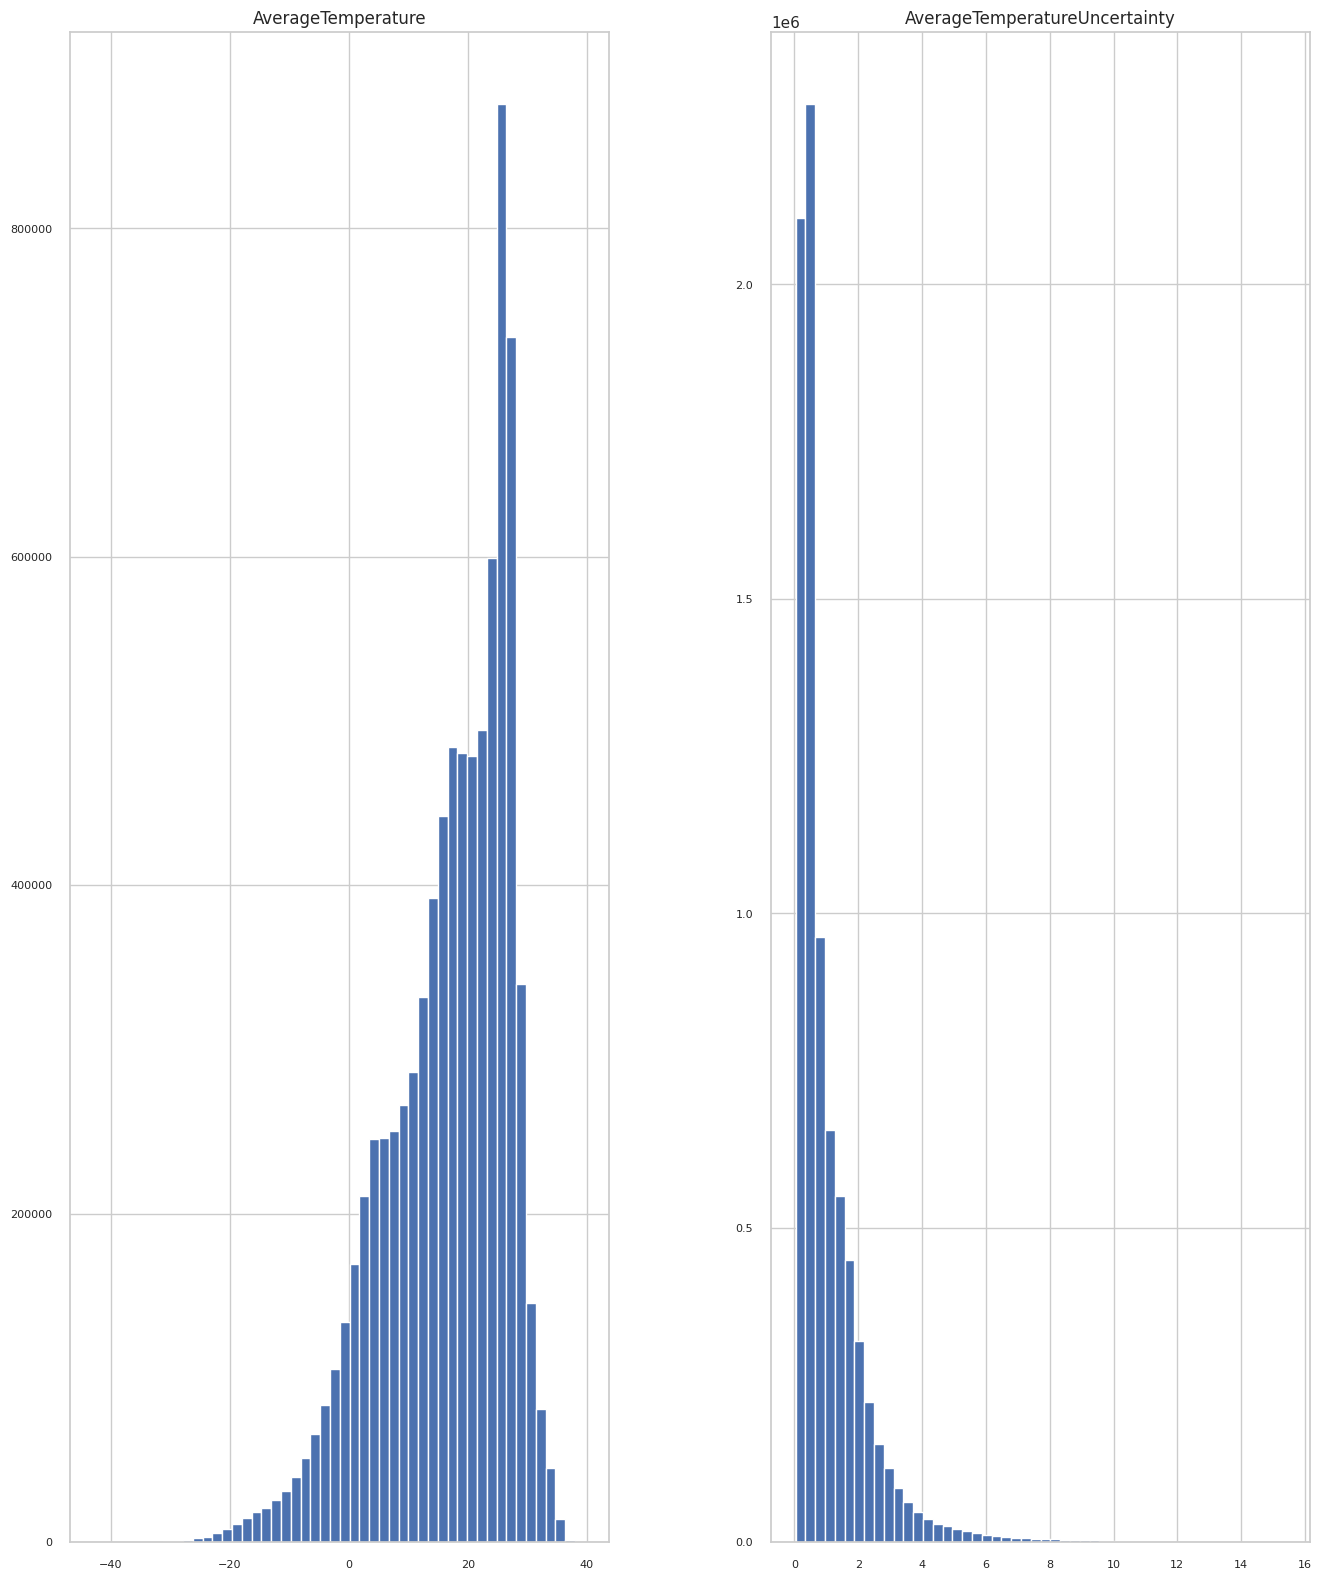

In [60]:
data = data.select_dtypes(include = ['float64', 'int64'])
data.head()
data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [61]:
!pip install seaborn==0.11.0

## EDA for Global Temp based on Continent 

## Importing Libraries

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

pd.options.mode.chained_assignment = None

plt.rcParams['figure.figsize'] = [6, 4]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

sns.set(style="whitegrid")
sns.set_color_codes("pastel")

## Importing csv

In [63]:

countries = pd.read_csv("../input/global-warming-dataset/DA proj/GlobalLandTemperaturesByCity.csv")


countries['Date'] = pd.to_datetime(countries['dt'])
countries['year'] = countries['Date'].dt.year


by_year = countries.groupby(by = ['year', 'City', 'Country', 'Latitude', 'Longitude']).mean().reset_index()


continent_map = pd.read_csv("../input/global-warming-dataset/DA proj/continents2.csv")
continent_map['Country'] = continent_map['name']
continent_map = continent_map[['Country', 'region', 'alpha-2', 'alpha-3']]


data = pd.merge(left = by_year, right = continent_map, on = 'Country', how = 'left')


data = data[data['year'] >= 1825]



region = data.dropna(axis = 0).groupby(by = ['region', 'year']).mean().reset_index()
countries = data.dropna(axis = 0).groupby(by = ['region', 'Country', 'year']).mean().reset_index()
cities = data.dropna(axis = 0).groupby(by = ['region', 'Country', 'City', 'year', 'Latitude', 'Longitude']).mean().reset_index()
Continent_df = data.copy()

## Counting Number of rows and colums

In [64]:
print("Total rows in the dataset:",data.count()["year"])
print(" Total Number of Columns in the dataset: ",len(data. axes[1]))

Total rows in the dataset: 635085
 Total Number of Columns in the dataset:  10


## Counting Number of missing values in each column

In [65]:
print("Total Number of Missing Values in each Column:",data.isnull().sum())

Total Number of Missing Values in each Column: year                                 0
City                                 0
Country                              0
Latitude                             0
Longitude                            0
AverageTemperature               17639
AverageTemperatureUncertainty    17639
region                            4126
alpha-2                           4283
alpha-3                           4126
dtype: int64


## Calculating total number of missing values

In [66]:
print(" Total Number of Missing Values",data.isnull().sum().sum())

 Total Number of Missing Values 47813


## Calculating the total number of outliers

In [67]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print("Total Number of Outliers for each column \n",((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum())
print("Total Number of Outliers ",((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum().sum())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  after removing the cwd from sys.path.


Total Number of Outliers for each column 
 AverageTemperature                 167
AverageTemperatureUncertainty    18100
City                                 0
Country                              0
Latitude                             0
Longitude                            0
alpha-2                              0
alpha-3                              0
region                               0
year                                 0
dtype: int64


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """


Total Number of Outliers  18267


In [68]:
data.duplicated(keep=False)

83246     False
83247     False
83248     False
83249     False
83250     False
          ...  
718326    False
718327    False
718328    False
718329    False
718330    False
Length: 635085, dtype: bool

> From the above result we can infer that there is no duplicate data present

In [69]:
data.tail()

,year,City,Country,Latitude,Longitude,AverageTemperature,AverageTemperatureUncertainty,region,alpha-2,alpha-3
718326,2013,Århus,Denmark,57.05N,10.33E,8.497625,0.375250,Europe,DK,DNK
718327,2013,Çorlu,Turkey,40.99N,27.69E,15.796875,0.498125,Asia,TR,TUR
718328,2013,Çorum,Turkey,40.99N,34.08E,12.800375,0.379500,Asia,TR,TUR
718329,2013,Öskemen,Kazakhstan,50.63N,82.39E,4.595500,0.644250,Asia,KZ,KAZ
718330,2013,Ürümqi,China,44.20N,87.20E,9.472000,0.841000,Asia,CN,CHN


In [70]:
print("Total rows in the dataset:",data.count()["Country"])
print("Maximum recorded temperature:",data.max()["AverageTemperature"])
print("Minimum recorded temperature:",data.min()["AverageTemperature"])

Total rows in the dataset: 635085


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Maximum recorded temperature: 32.333
Minimum recorded temperature: -14.812000000000003


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


In [71]:
Region_data = data[data["region"]=="Americas"]
Region_data.head()

,year,City,Country,Latitude,Longitude,AverageTemperature,AverageTemperatureUncertainty,region,alpha-2,alpha-3
83252,1825,Abilene,United States,32.95N,100.53W,17.149833,2.414167,Americas,US,USA
83254,1825,Acarigua,Venezuela,8.84N,68.92W,27.166333,1.719583,Americas,VE,VEN
83258,1825,Acuña,Mexico,29.74N,101.54W,19.556917,2.352500,Americas,MX,MEX
83276,1825,Akron,United States,40.99N,80.95W,10.322500,2.049750,Americas,US,USA
83285,1825,Albuquerque,United States,34.56N,107.03W,11.276750,2.345417,Americas,US,USA


In [72]:
print("Total rows in the dataset:",Region_data.count()["Country"])
print("Maximum recorded temperature:",Region_data.max()["AverageTemperature"])
print("Minimum recorded temperature:",Region_data.min()["AverageTemperature"])
print("Average recorded temperature:",Region_data.mean()["AverageTemperature"])

Total rows in the dataset: 151943
Maximum recorded temperature: 30.54133333333333
Minimum recorded temperature: -8.87625
Average recorded temperature: 18.52902571873155


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


In [73]:
Region_data.describe(include=['object'])

,City,Country,Latitude,Longitude,region,alpha-2,alpha-3
count,151943,151943,151943,151943,151943,151943,151943
unique,825,27,64,332,1,27,27
top,Springfield,United States,23.31S,46.31W,Americas,US,USA
freq,567,46926,12512,6916,151943,46926,46926


In [74]:
Region_data = Region_data.drop(["City","Country","Latitude","Longitude","alpha-2","alpha-3","region"],axis=1)
Region_data.head()

,year,AverageTemperature,AverageTemperatureUncertainty
83252,1825,17.149833,2.414167
83254,1825,27.166333,1.719583
83258,1825,19.556917,2.352500
83276,1825,10.322500,2.049750
83285,1825,11.276750,2.345417


In [75]:
Region_data.dtypes

year                               int64
AverageTemperature               float64
AverageTemperatureUncertainty    float64
dtype: object

In [76]:
Region_data.rename(columns = {'AverageTemperature':'temperature', 'AverageTemperatureUncertainty':'deviation'}, inplace = True)
Region_data.head()

,year,temperature,deviation
83252,1825,17.149833,2.414167
83254,1825,27.166333,1.719583
83258,1825,19.556917,2.352500
83276,1825,10.322500,2.049750
83285,1825,11.276750,2.345417


In [77]:
Region_data.index = np.arange(1, len(Region_data) + 1) 
Region_data.head()

,year,temperature,deviation
1,1825,17.149833,2.414167
2,1825,27.166333,1.719583
3,1825,19.556917,2.352500
4,1825,10.322500,2.049750
5,1825,11.276750,2.345417


In [78]:
missing_data = Region_data[Region_data.isnull().any(axis=1)]
print("Total rows with missing data:",len(missing_data))

Total rows with missing data: 3978


## Calculating the correlation between variables

<AxesSubplot:>

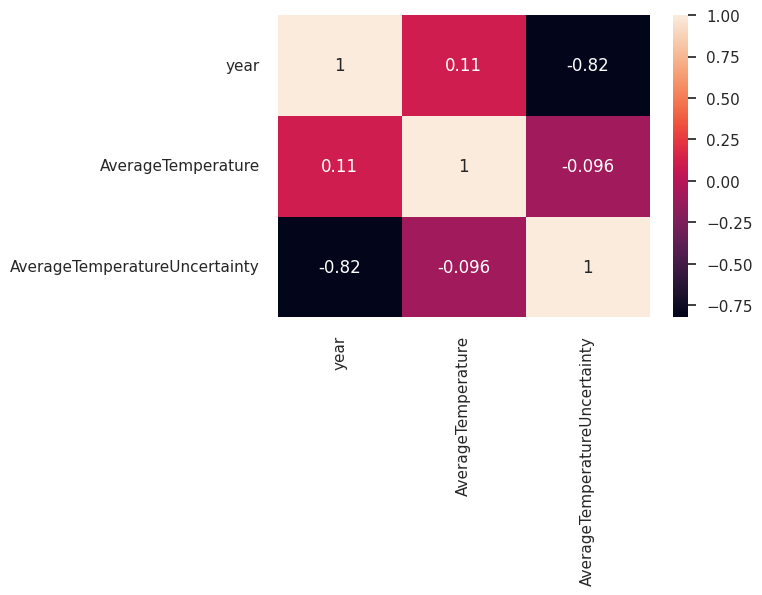

In [89]:
Continent_df = Continent_df.dropna()

corr=Continent_df.corr(method='pearson')
sns.heatmap(corr,annot=True)


<AxesSubplot:xlabel='year', ylabel='count'>

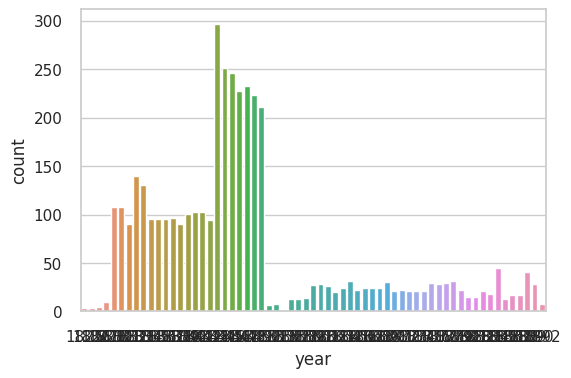

In [80]:
sns.countplot(x="year", data=missing_data)

In [81]:
print("Number of rows before removing missing data:",len(Region_data))
Region_data = Region_data.dropna()
print("Number of rows after removing missing data:",len(Region_data))

Number of rows before removing missing data: 151943
Number of rows after removing missing data: 147965


<AxesSubplot:xlabel='year', ylabel='temperature'>

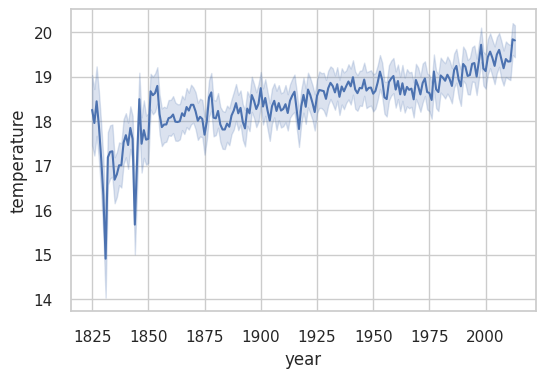

In [82]:
sns.lineplot(data=Region_data, x="year", y="temperature")

<AxesSubplot:xlabel='year', ylabel='temperature'>

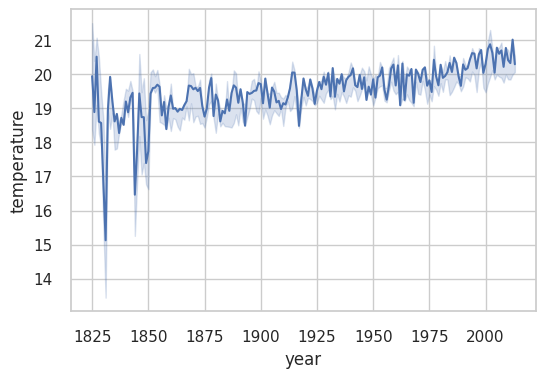

In [83]:
sns.lineplot(data=Region_data, x="year", y="temperature", estimator=np.median)

<AxesSubplot:xlabel='year', ylabel='deviation'>

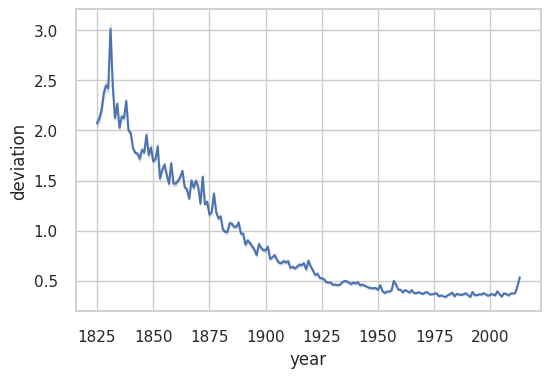

In [84]:
sns.lineplot(x="year", y="deviation", data=Region_data)

<AxesSubplot:xlabel='temperature', ylabel='deviation'>

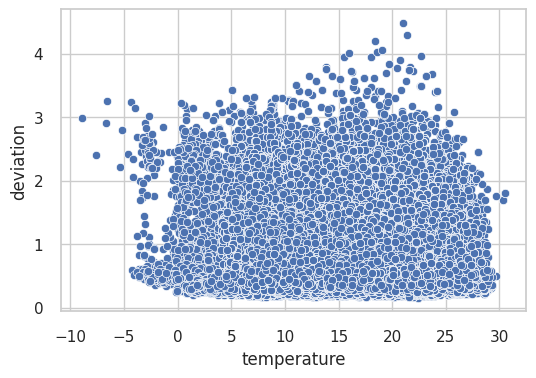

In [85]:
sns.scatterplot(data=Region_data, x="temperature", y="deviation")

count    147965.000000
mean         18.529026
std           5.994465
min          -8.876250
25%          15.286000
50%          19.537167
75%          23.179333
max          30.541333
Name: temperature, dtype: float64


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


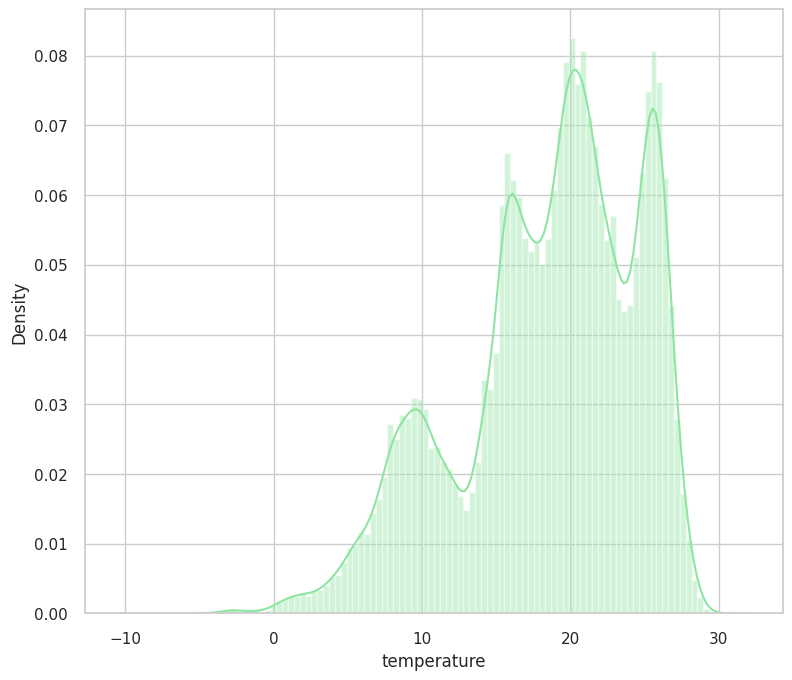

In [86]:
print(Region_data['temperature'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(Region_data['temperature'], color='g', bins=100, hist_kws={'alpha': 0.4});

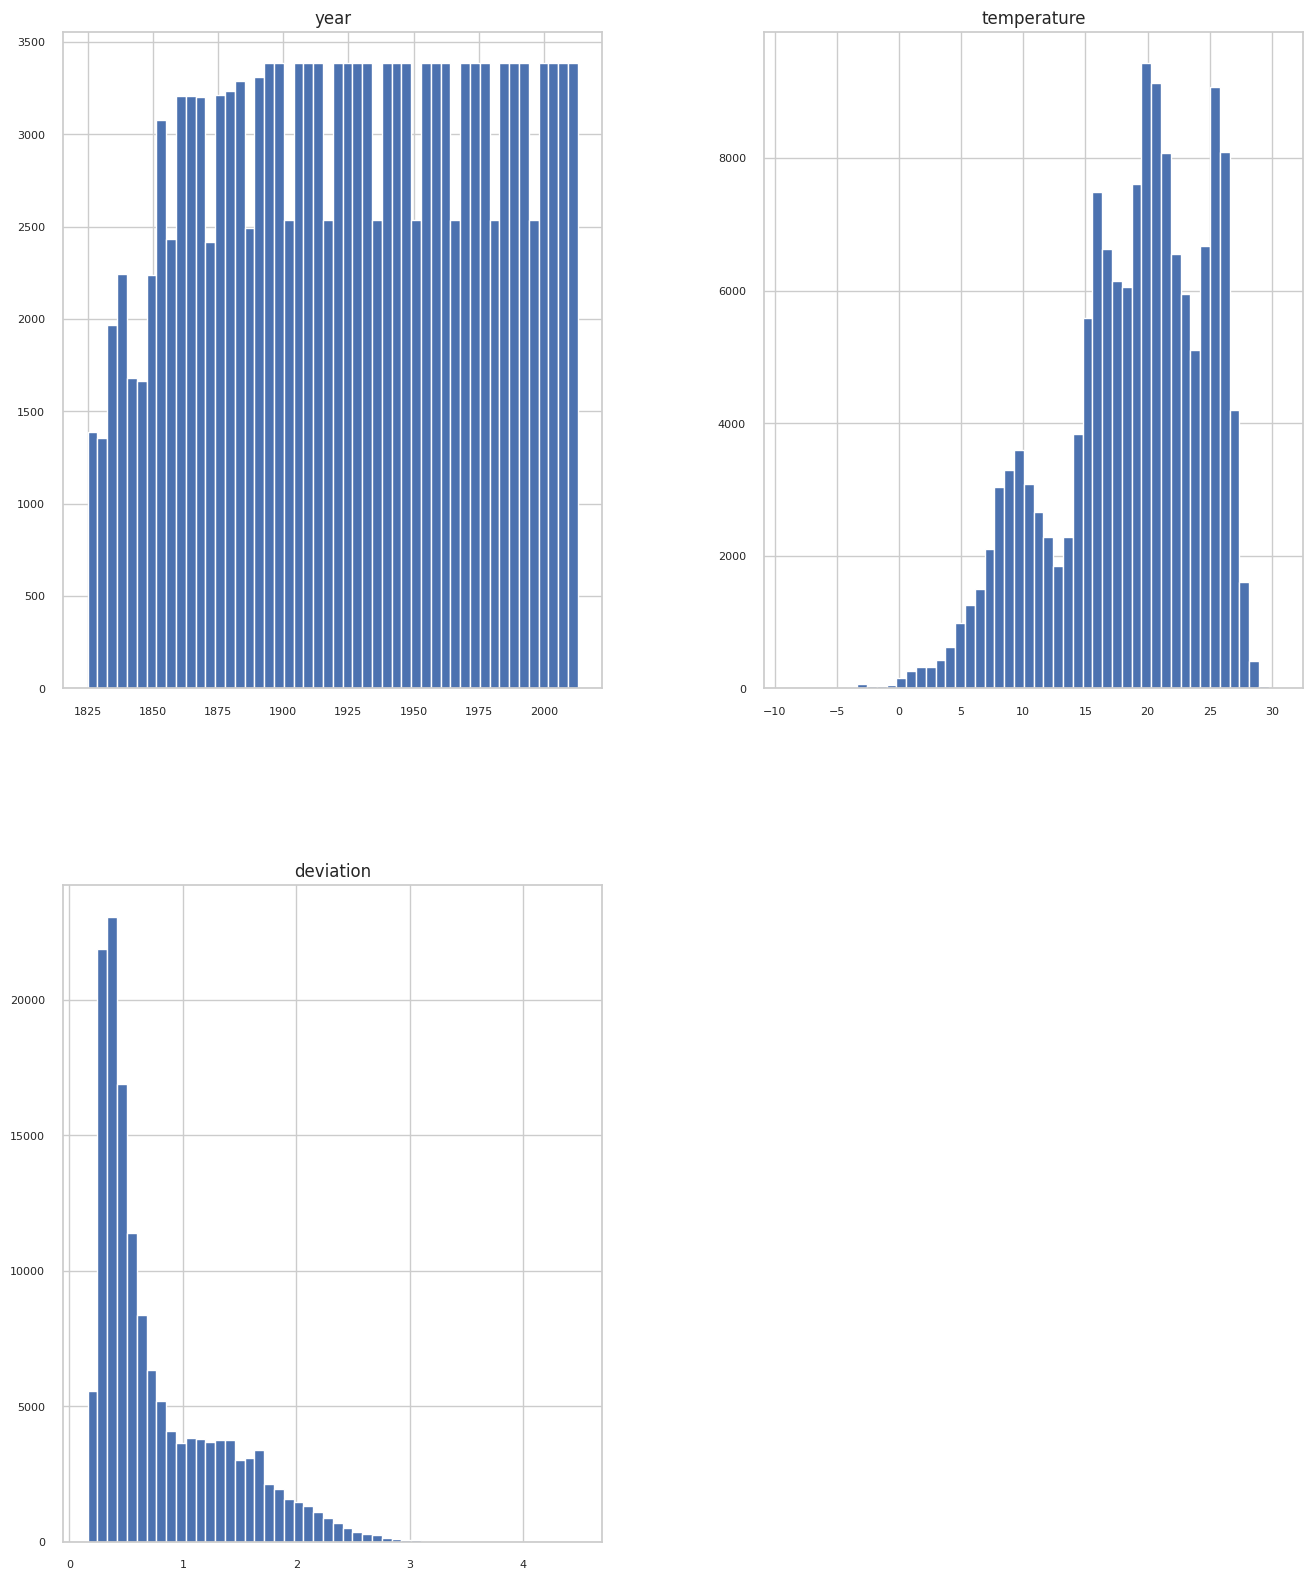

In [87]:
Region_data = Region_data.select_dtypes(include = ['float64', 'int64'])
Region_data.head()
Region_data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);